In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# 제공 -> codepresso
url = 'https://codepresso-online-platform-public.s3.ap-northeast-2.amazonaws.com/learning-resourse/python-data-analysis/bike_2101_utf8_0618.csv'

In [3]:
bike_data = pd.read_csv(url)

In [4]:
bike_data.head(3)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.90,0.23,992.78,13
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.50,10
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0.00,0.00,0.00,7


In [5]:
bike_data.tail(3)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
718854,2021-01-31,23,248,248. 초원아파트 앞,단체권,NaN,20대,2,348.43,2.91,12569.64,90
718855,2021-01-31,23,131,131. 증산2교,단체권,NaN,20대,2,98.10,0.77,3302.87,20
718856,2021-01-31,23,247,247. 당산역 10번출구 앞,단체권,M,40대,1,223.71,2.02,8691.10,52


In [6]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718857 entries, 0 to 718856
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   대여일자    718857 non-null  object 
 1   대여시간    718857 non-null  int64  
 2   대여소번호   718857 non-null  int64  
 3   대여소명    718857 non-null  object 
 4   대여구분코드  718857 non-null  object 
 5   성별      401235 non-null  object 
 6   연령대코드   718857 non-null  object 
 7   이용건수    718857 non-null  int64  
 8   운동량     718857 non-null  object 
 9   탄소량     718857 non-null  object 
 10  이동거리    718857 non-null  float64
 11  사용시간    718857 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 65.8+ MB


In [7]:
# columns data 확인 
bike_data.columns

Index(['대여일자', '대여시간', '대여소번호', '대여소명', '대여구분코드', '성별', '연령대코드', '이용건수', '운동량',
       '탄소량', '이동거리', '사용시간'],
      dtype='object')

#1. 데이터 전처리
     1. 범주형 데이터가 수치형 데이터로 
        저장되어 있을 경우 수정하기

In [8]:
bike_data['대여시간'].unique()
# 수치형 데이터의 예시

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [9]:
bike_data['운동량'].unique()
# 원래는 수치형 데이터 여야 하지만 현재 범주형 데이터로 판단.


array(['28.90', '34.38', '0.00', ..., '509.20', '916.66', '492.87'],
      dtype=object)

In [10]:
bike_data['운동량'].describe()

count     718857
unique     51422
top         0.00
freq       73806
Name: 운동량, dtype: object

describe() 를 이용한 원래 수치형인 이유

 -> 범주형 데이터는 적어도 10개 이하의 수

 -> 수가 이렇게 많다는 것은 원래 수치형 데이터라는 것   
 
 -> 대부분, 문자 하나때문에 범주형 데이터가 되는 경우 대다수

수치형 데이터로 전처리 과정 

-> 결측값 살펴보기

-> 패턴매치로 이상값 찾기 즉, 특수문자 찾기

-> 특수문자가 들어간 데이터 위치 조회

-> 모두 결측치로 바꾸기 

이유: 결측치로 처리하게 되면 일일히 한번에 수정하지 않고
      한번에 처리하기 쉬워지기 때문에!

-> 데이터 타입 변경

In [11]:
#1. 결측치 값 찾아보기 
bike_data["운동량"].isnull().sum()

0

In [12]:
#2. 특수문자 찾기
pattern ='([0-9])' 
bike_data['temp'] = bike_data['운동량'].str.match(pattern)
bike_data.head()         

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,temp
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.90,0.23,992.78,13,True
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.50,10,True
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0.00,0.00,0.00,7,True
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,NaN,~10대,1,38.75,0.38,1658.34,14,True
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,NaN,~10대,1,12.96,0.17,743.88,5,True


In [13]:
bike_data.loc[bike_data["운동량"]=='\\N',"운동량"]

57        \N
78        \N
240       \N
311       \N
397       \N
          ..
717806    \N
718106    \N
718242    \N
718591    \N
718619    \N
Name: 운동량, Length: 4569, dtype: object

In [14]:
# 특수문자 값 -> 결측치 값 변경
bike_data.loc[bike_data["운동량"]=="\\N","운동량"] = np.nan

In [15]:
bike_data.isnull().sum()
# 처음 결측치 값 조회때랑은 다르게 운동량에 결측치 값이 생긴 것을 알 수있다. 

대여일자           0
대여시간           0
대여소번호          0
대여소명           0
대여구분코드         0
성별        317622
연령대코드          0
이용건수           0
운동량         4569
탄소량            0
이동거리           0
사용시간           0
temp           0
dtype: int64

In [16]:
# 임시 파일 temp 삭제하기 
bike_data.drop(columns='temp', inplace=True)

In [17]:
# 데이터 타입 변경 
bike_data['운동량']= bike_data['운동량'].astype(float)

In [18]:
bike_data.info()
# 운동량 dtype 이 object 에서 flaot 로 바뀐것을 볼 수 있음! 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718857 entries, 0 to 718856
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   대여일자    718857 non-null  object 
 1   대여시간    718857 non-null  int64  
 2   대여소번호   718857 non-null  int64  
 3   대여소명    718857 non-null  object 
 4   대여구분코드  718857 non-null  object 
 5   성별      401235 non-null  object 
 6   연령대코드   718857 non-null  object 
 7   이용건수    718857 non-null  int64  
 8   운동량     714288 non-null  float64
 9   탄소량     718857 non-null  object 
 10  이동거리    718857 non-null  float64
 11  사용시간    718857 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 65.8+ MB


In [19]:
bike_data["탄소량"].unique() 
# 마찬가지로 범주형으로 설정되어있음 -> 수치형으로 변형시켜야함

array(['0.23', '0.26', '0.00', ..., '9.13', '46.93', '14.15'],
      dtype=object)

In [20]:
bike_data["탄소량"].isnull().sum()

0

In [21]:
pattern='([0-9])'
bike_data['temp'] = bike_data["탄소량"].str.match(pattern)
bike_data.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,temp
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.90,0.23,992.78,13,True
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.50,10,True
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0.00,0.00,0.00,7,True
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,NaN,~10대,1,38.75,0.38,1658.34,14,True
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,NaN,~10대,1,12.96,0.17,743.88,5,True


In [22]:
bike_data.loc[bike_data["탄소량"]=="\\N",'탄소량']

57        \N
78        \N
240       \N
311       \N
397       \N
          ..
717806    \N
718106    \N
718242    \N
718591    \N
718619    \N
Name: 탄소량, Length: 4569, dtype: object

In [23]:
bike_data.loc[bike_data["탄소량"]=="\\N","탄소량"] = np.nan

In [24]:
bike_data["탄소량"] = bike_data["탄소량"].astype(float)

In [25]:
bike_data.drop(columns="temp", inplace=True)

In [26]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718857 entries, 0 to 718856
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   대여일자    718857 non-null  object 
 1   대여시간    718857 non-null  int64  
 2   대여소번호   718857 non-null  int64  
 3   대여소명    718857 non-null  object 
 4   대여구분코드  718857 non-null  object 
 5   성별      401235 non-null  object 
 6   연령대코드   718857 non-null  object 
 7   이용건수    718857 non-null  int64  
 8   운동량     714288 non-null  float64
 9   탄소량     714288 non-null  float64
 10  이동거리    718857 non-null  float64
 11  사용시간    718857 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 65.8+ MB


#2. 결측치 처리

1. 성별의 결측치 값이 매우 많음.

In [27]:
bike_data["성별"].unique()

array([nan, 'F', 'M', 'f', 'm'], dtype=object)

In [28]:
bike_data["성별"].value_counts()
# 소문자와 대문자가 모두 분리되어있는 것을 확인 

M    262477
F    138500
m       212
f        46
Name: 성별, dtype: int64

동일 카테고리 값 F,M,f,m 값의 혼용

-> 대문자, 소문자 일괄 통일 

-> 기본 전처리의 역할 수행하는 것!

-> 결측치의 값을 다른 설정값으로 변경

-> pie 차트로 시각화 즉, 한눈에 파악하기 쉽도록 전처리

In [29]:
bike_data["성별"] = bike_data["성별"].str.upper()

In [30]:
# 대문자 일괄 통일 
bike_data["성별"].value_counts()

M    262689
F    138546
Name: 성별, dtype: int64

In [31]:
bike_data['성별'].isnull().sum()
# f.m 을 제외한 결측치 값의 수 

317622

In [32]:
# 다른 설정값으로 대체
bike_data.fillna({"성별":"U"},inplace=True)

In [33]:
# 결측치 값 없어진것 확인 
bike_data["성별"].isnull().sum()

0

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0, flags=flags)


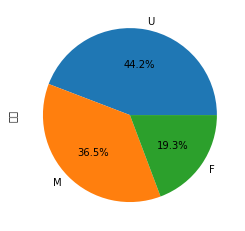

In [34]:
# Pie 차트로 시각화
result = bike_data["성별"].value_counts()
result.plot.pie(autopct = '%1.1f%%')

2. 남아있는 결측치 값 처리

-> 1.n개의 결측치를 평균 값으로 대체하는 방법 
 
-> 2. 결측치값이 한개라도 있는 데이터를 삭제

In [35]:
bike_data.isnull().sum()

대여일자         0
대여시간         0
대여소번호        0
대여소명         0
대여구분코드       0
성별           0
연령대코드        0
이용건수         0
운동량       4569
탄소량       4569
이동거리         0
사용시간         0
dtype: int64

In [36]:
#1.운동량 결측치 값 평균값으로 대체
mean_value = bike_data["운동량"].mean()
bike_data.fillna({"운동량":mean_value},inplace=True)

In [37]:
# 탄소량 결측치 값 데이터 삭제 방법 이용 
bike_data.dropna(inplace=True)

In [38]:
bike_data.isnull().sum()

대여일자      0
대여시간      0
대여소번호     0
대여소명      0
대여구분코드    0
성별        0
연령대코드     0
이용건수      0
운동량       0
탄소량       0
이동거리      0
사용시간      0
dtype: int64

#3. 이상치 처리

1. IQR 기반의 이상치 찾기 

(*이상치: 모델의 성능을 떨어뜨리는 불필요한 요소이므로 제거 필수!)

-> IQR 활용한 이상치 함수 구현

-> 원하는 column값 기준으로 이상치 찾기

-> outliers 의 인덱스 값 이용하여 행 조회 

-> 이상치 존재하는 행 제거하여 원본에 반영 

In [39]:
bike_data.describe()

,대여시간,대여소번호,이용건수,운동량,탄소량,이동거리,사용시간
count,714288.000000,714288.000000,714288.000000,714288.000000,714288.000000,714288.000000,714288.000000
mean,14.198370,1447.288182,1.089506,82.052553,0.708358,3053.298050,27.952880
std,5.245724,1015.104043,0.340697,117.619759,0.994735,4287.593558,33.114494
min,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,601.000000,1.000000,21.090000,0.190000,802.147500,8.000000
50%,15.000000,1230.000000,1.000000,45.070000,0.390000,1694.905000,16.000000
75%,18.000000,2113.000000,1.000000,96.050000,0.830000,3590.330000,36.000000
max,23.000000,9999.000000,14.000000,8621.750000,57.630000,248420.000000,1753.000000


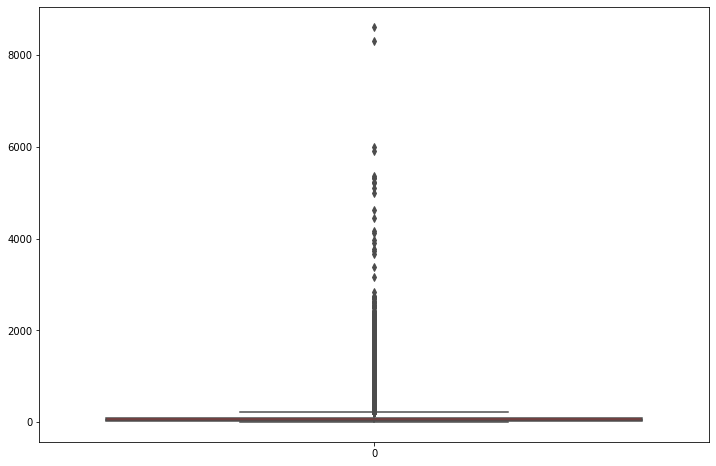

In [40]:
plt.figure(figsize=(12,8))
sns.boxplot(data = bike_data["운동량"], color = 'red')
plt.show()

In [41]:
# IQR 활용한 이상치 함수 구현
def outliers_iqr(data):
  q1 = np.percentile(data,25)
  q3 = np.percentile(data,75)
  iqr = q3-q1
  min_bound = q1 -(iqr * 1.5)
  max_bound = q3 + (iqr * 1.5)
  return data [(data > max_bound) | (data < min_bound)].index
  # 제거해야할 이상치 값을 return

In [42]:
# '운동량' 컬럼 값 기준으로 이상치 찾기
idx = outliers_iqr(bike_data["운동량"])
bike_data.loc[idx,"운동량"]

34        211.48
41        478.03
45        296.28
46        226.85
183       295.63
           ...  
718848    586.40
718852    916.66
718853    492.87
718854    348.43
718856    223.71
Name: 운동량, Length: 65672, dtype: float64

In [43]:
bike_data = bike_data.drop(idx, axis=0)
# 이상치 값 삭제

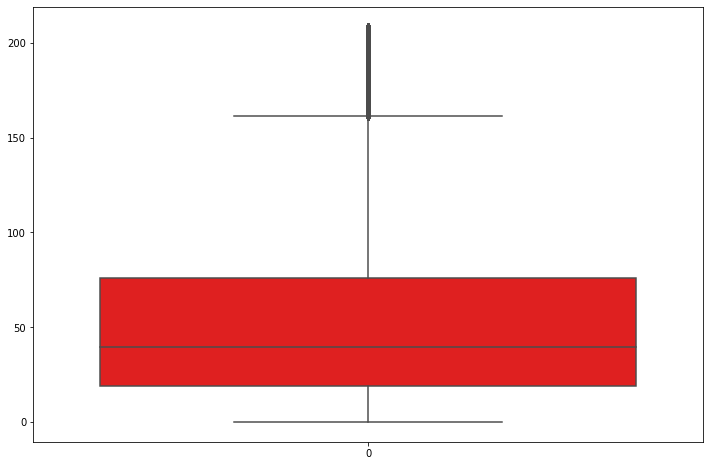

In [45]:
plt.figure(figsize=(12,8))
sns.boxplot(data = bike_data["운동량"], color = 'red')
plt.show()